In [11]:
  pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


Requirement already up-to-date: google-api-python-client in c:\users\aryan\onedrive\jup\lib\site-packages (2.39.0)Note: you may need to restart the kernel to use updated packages.
Requirement already up-to-date: google-auth-httplib2 in c:\users\aryan\onedrive\jup\lib\site-packages (0.1.0)
Requirement already up-to-date: google-auth-oauthlib in c:\users\aryan\onedrive\jup\lib\site-packages (0.5.0)



In [ ]:
imported google api client

In [5]:
from googleapiclient.discovery import build
import pandas as pd
import json
import time
import nltk
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression



Imported all the necessary python handlers and the API

In [6]:
df = pd.read_csv('C:/Users/aryan/Downloads/labeled_and_scored_comments.csv')

Imported data frame as a csv file

In [7]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


Sorted values according to toxicity score

In [13]:
def get_toxicity_score(comment):
  API_KEY = ''
  client = build(
   "commentanalyzer",
   "v1alpha1",
   developerKey=API_KEY,
   discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
   static_discovery=False,
  )
  analyze_request = {
  'comment': { 'text': comment },
  'requestedAttributes': {'TOXICITY': {}}
  }
    
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
  return toxicity_score

Wrote code to return the toxicity score of any comment entered manually

In [14]:
get_toxicity_score("cunt")

0.9480856

Got toxicity scores of different comments

In [15]:
unique_val = df['score'].mode()

Code to get most frequent value in the API dataset

In [147]:
print(unique_val)

0    0.310894
dtype: float64


In [148]:
val = df['score'].mean()

Code to return the mean value of all comments

In [149]:
print(val)

0.2444668346830467


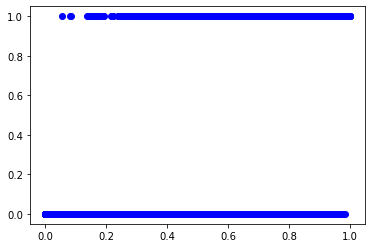

In [150]:
dfs = df.sort_values(['score'])
plt.plot(dfs['score'], dfs['toxic'],'bo')

Sorted values according to score, then plotted on a graph to see relationship between score and toxic

In [151]:
dfs['comment_text'][dfs['toxic'].idxmax()]

'And we have a winner for the douchiest comment award.'

Code for finding the first comment with toxicity score 1

In [154]:
dfs.toxic == 1

1158     False
5246     False
11040    False
24192    False
2332     False
         ...  
19994     True
28728     True
25535     True
25945     True
17833     True
Name: toxic, Length: 41338, dtype: bool

Sorted data frame for comments with 1 as score for toxic parameter

In [153]:
dfs[np.logical_and(dfs.toxic == 1, dfs.severe_toxic == 1)]

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
27263,e0539a647a5ed61d,War CriminalWar CriminalWar CriminalWar Crimin...,0.496129,1,1,0,0,0,0
33118,c0e076f0011acaa6,"""FFFFF UUUUUU CCCCCC KKKKKK ===== YOU! F UU C ...",0.680817,1,1,1,0,1,0
28910,d73516d5de7f7384,big>I HATE Nl33ERS\nI HATE Nl33ERS\nI HATE Nl3...,0.715894,1,1,1,0,1,1
17101,41fe17d86e765e7b,"WIKI NAZI! \n\nThat's all you are, you even re...",0.744944,1,1,0,0,0,0
25371,eab35a94edfe8946,Remeber rahmatul lil alameen? You Sunni monkey...,0.768935,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
6964,e88321c89a619419,Stupid fucking bitch rot in hell piece of shit,0.996872,1,1,1,0,1,0
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0


sorted data frame for all comments with toxicity and severe toxicity parameters = 1

In [155]:
dfs.corr('pearson')

,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
score,1.000000,0.743818,0.269247,0.617662,0.139869,0.590391,0.252640
toxic,0.743818,1.000000,0.296236,0.680411,0.157603,0.653602,0.284198
severe_toxic,0.269247,0.296236,1.000000,0.384894,0.119512,0.360643,0.230999
obscene,0.617662,0.680411,0.384894,1.000000,0.140290,0.737114,0.296596
threat,0.139869,0.157603,0.119512,0.140290,1.000000,0.151432,0.106783
insult,0.590391,0.653602,0.360643,0.737114,0.151432,1.000000,0.365971
identity_hate,0.252640,0.284198,0.230999,0.296596,0.106783,0.365971,1.000000


Foud correlation between all scores and parameters

In [156]:
dfs['comment_text'].count()

41338

Found number of all comments in the data frame

In [157]:
strlen = np.array([len(x) for x in dfs['comment_text']]).reshape(-1, 1)
score = dfs['score']

Sorted all comments according to length and converted into an array

In [158]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(strlen, score)

Ran linear regression between comment length as explanatory and score as response variable

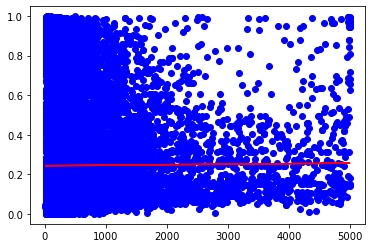

In [159]:
plt.plot(strlen, score, 'bo')
plt.plot(strlen, reg.predict(strlen),'r-')

Plotted linear regression with all data points 

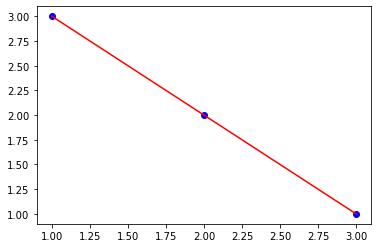

In [160]:
dummyX = np.array([1,2,3]).reshape(-1, 1)
dummyY = [3,2,1]
reg = LinearRegression().fit(dummyX, dummyY)
plt.plot(dummyX, dummyY, 'bo')
plt.plot(dummyX, reg.predict(dummyX),'r-')

created and plotted dummy variable in order to verify relationship and confirm/ deny hypothesis